In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#references the classes that were mapped in each table.
Base.classes.keys()

# Save references to each table
#Measurement = Base.classes.measurement
#Station = Base.classes.station

['measurement', 'station']

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [20]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)


In [33]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [36]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_temp, columns=['date','June temperature'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))


       date  June temperature
 2010-06-01              78.0
 2010-06-02              76.0
 2010-06-03              78.0
 2010-06-04              76.0
 2010-06-05              77.0
 2010-06-06              78.0
 2010-06-07              77.0
 2010-06-08              78.0
 2010-06-09              78.0
 2010-06-10              79.0
 2010-06-11              78.0
 2010-06-12              78.0
 2010-06-13              78.0
 2010-06-14              77.0
 2010-06-15              78.0
 2010-06-16              78.0
 2010-06-17              77.0
 2010-06-18              77.0
 2010-06-19              82.0
 2010-06-20              78.0
 2010-06-21              78.0
 2010-06-22              78.0
 2010-06-23              78.0
 2010-06-24              78.0
 2010-06-25              77.0
 2010-06-26              76.0
 2010-06-27              78.0
 2010-06-28              78.0
 2010-06-29              78.0
 2010-06-30              78.0
 2011-06-01              77.0
 2011-06-02              78.0
 2011-06-0

In [23]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [26]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [31]:
# 7. Convert the December temperatures to a list.
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [35]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(dec_temp, columns=['date','December temperature'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))


       date  December temperature
 2010-12-01                  76.0
 2010-12-03                  74.0
 2010-12-04                  74.0
 2010-12-06                  64.0
 2010-12-07                  64.0
 2010-12-08                  67.0
 2010-12-09                  77.0
 2010-12-10                  66.0
 2010-12-11                  69.0
 2010-12-12                  68.0
 2010-12-13                  68.0
 2010-12-14                  71.0
 2010-12-15                  74.0
 2010-12-16                  67.0
 2010-12-17                  66.0
 2010-12-18                  69.0
 2010-12-19                  71.0
 2010-12-23                  70.0
 2010-12-24                  70.0
 2010-12-26                  74.0
 2010-12-27                  74.0
 2010-12-28                  71.0
 2010-12-29                  75.0
 2010-12-30                  75.0
 2010-12-31                  72.0
 2011-12-01                  69.0
 2011-12-02                  68.0
 2011-12-03                  73.0
 2011-12-04   

In [30]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [60]:
June_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6)


In [61]:
df = pd.DataFrame(June_prcp, columns=['Date','June Precipitation'])
df.set_index(df['Date'], inplace=True)
print(df.to_string(index=False))


       Date  June Precipitation
 2010-06-01                0.00
 2010-06-02                0.01
 2010-06-03                0.00
 2010-06-04                0.00
 2010-06-05                0.00
 2010-06-06                0.00
 2010-06-07                0.00
 2010-06-08                0.00
 2010-06-09                0.00
 2010-06-10                0.00
 2010-06-11                0.00
 2010-06-12                0.00
 2010-06-13                0.00
 2010-06-14                0.00
 2010-06-15                0.00
 2010-06-16                0.00
 2010-06-17                0.00
 2010-06-18                0.00
 2010-06-19                0.00
 2010-06-20                0.00
 2010-06-21                0.00
 2010-06-22                0.00
 2010-06-23                0.00
 2010-06-24                0.00
 2010-06-25                0.00
 2010-06-26                0.02
 2010-06-27                0.00
 2010-06-28                0.00
 2010-06-29                0.00
 2010-06-30                0.00
 2011-06

<AxesSubplot:xlabel='Date'>

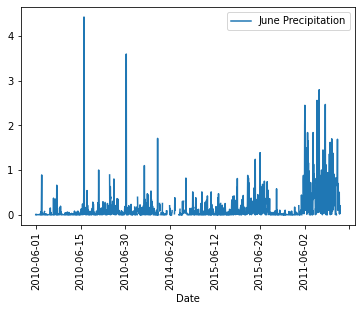

In [62]:
df.plot(rot=90)

In [63]:
df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [68]:
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12)

In [65]:
df = pd.DataFrame(dec_prcp, columns=['Date','December Precipitation'])
df.set_index(df['Date'], inplace=True)
print(df.to_string(index=False))

       Date  December Precipitation
 2010-12-01                    0.04
 2010-12-03                    0.00
 2010-12-04                    0.00
 2010-12-06                    0.00
 2010-12-07                    0.00
 2010-12-08                    0.00
 2010-12-09                    0.00
 2010-12-10                    1.58
 2010-12-11                    0.77
 2010-12-12                    0.00
 2010-12-13                    0.00
 2010-12-14                    0.00
 2010-12-15                    0.00
 2010-12-16                    0.00
 2010-12-17                    0.00
 2010-12-18                    0.00
 2010-12-19                    1.40
 2010-12-23                    0.00
 2010-12-24                    0.00
 2010-12-26                     NaN
 2010-12-27                    0.13
 2010-12-28                    0.55
 2010-12-29                    0.06
 2010-12-30                    0.01
 2010-12-31                    0.00
 2011-12-01                    0.03
 2011-12-02                 

<AxesSubplot:xlabel='Date'>

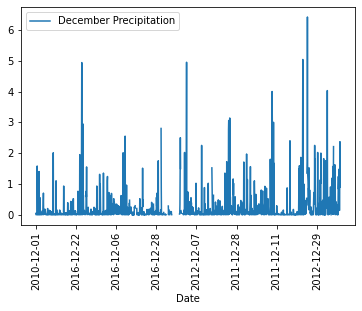

In [66]:
df.plot(rot=90)

In [67]:
df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
